In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from skopt import BayesSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

In [3]:
X_dev = pd.read_csv('finalized_data/X_dev.csv')
X_test = pd.read_csv('finalized_data/X_test.csv')
y_dev = pd.read_csv('finalized_data/y_dev.csv')
y_test = pd.read_csv('finalized_data/y_test.csv')

## Initial Tree (w/o Tuning)

__Tree Fitting__

In [15]:
## Decision Tree Fitting
tree_regressor = DecisionTreeRegressor(random_state=41)
tree_regressor.fit(X_dev, y_dev)

## Prediction
tree_regressor_dev_pred = tree_regressor.predict(X_dev)
tree_regressor_pred = tree_regressor.predict(X_test)

## Initial R2 Score
tree_regressor_dev_r2 = r2_score(y_dev, tree_regressor_dev_pred)
tree_regressor_r2 = r2_score(y_test, tree_regressor_pred)

print(f"Dev Score: {tree_regressor_dev_r2}")
print(f"Test Score: {tree_regressor_r2}")

Dev Score: 1.0
Test Score: -0.6242850039214853


__Tree Depth Visualization__

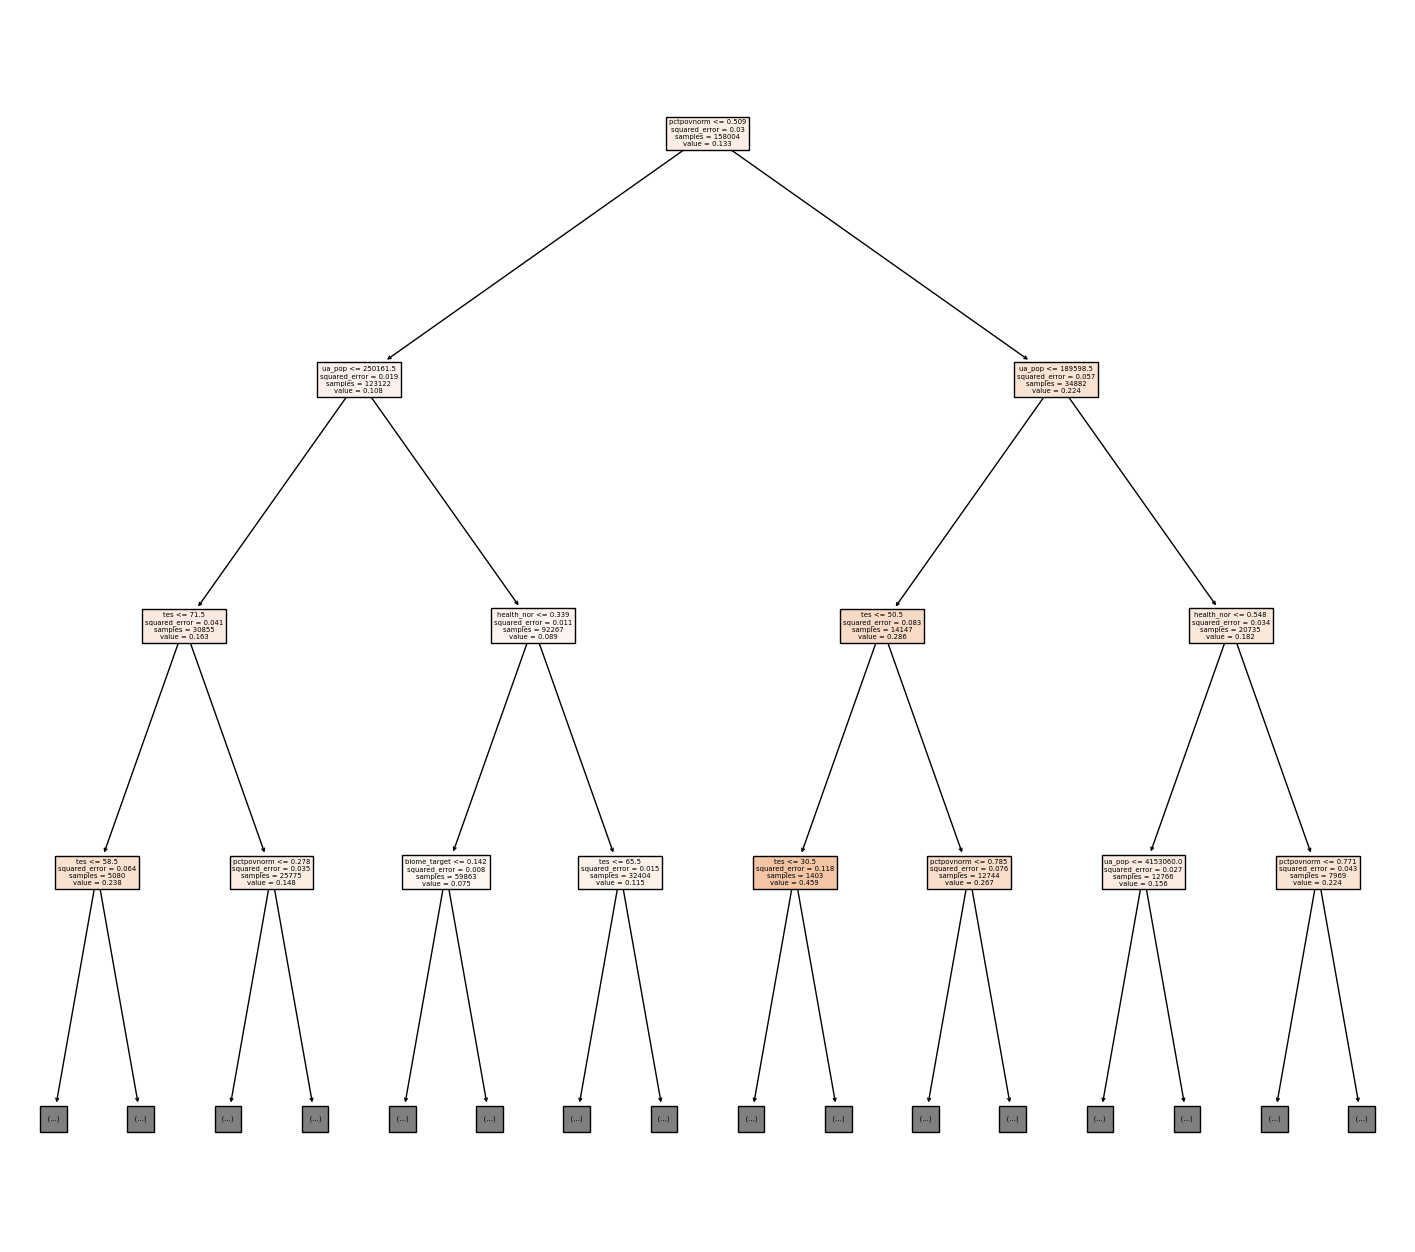

In [5]:
## Visualize Tree to depth 3
plt.figure(figsize=(18,16))
plot_tree(tree_regressor, filled=True, feature_names = list(X_dev.columns), max_depth=3)
plt.show()

__Feature Importance__

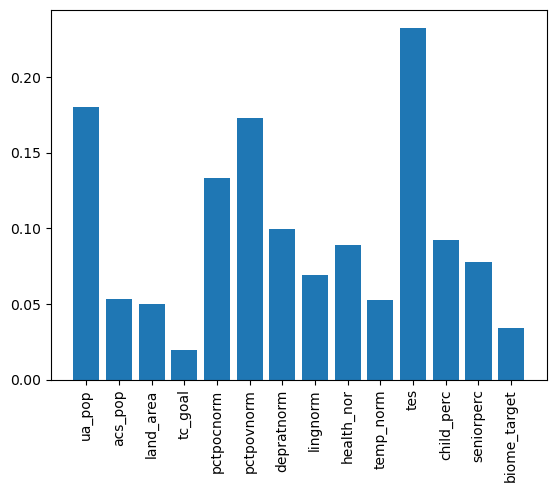

In [11]:
perm = permutation_importance(tree_regressor, X_test, y_test)
mean_perm = perm.importances_mean
plt.bar(X_dev.columns, mean_perm)
plt.xticks(rotation=90)
plt.show()

## CV ##

In [21]:
grid = {'max_depth': [2, 4, 6, 8], 'min_samples_leaf': [1, 2, 4, 8], 'max_features': ['sqrt', 'log2']}
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), grid, scoring='r2', cv=5)
grid_search.fit(X_dev, y_dev)
best_params = grid_search.best_params_
best_tree = grid_search.best_estimator_
best_score = grid_search.best_score_

print(f'Best parameters: {best_params}')
print(f'Best score: {best_score}')

/Users/shiva/Desktop/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
80 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/shiva/Desktop/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/shiva/Desktop/anaconda3/lib/python3.10/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/shiva/Desktop/anaconda3/lib/python3.10/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_param

Best parameters: {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 4}
Best score: 0.17320545156985093
